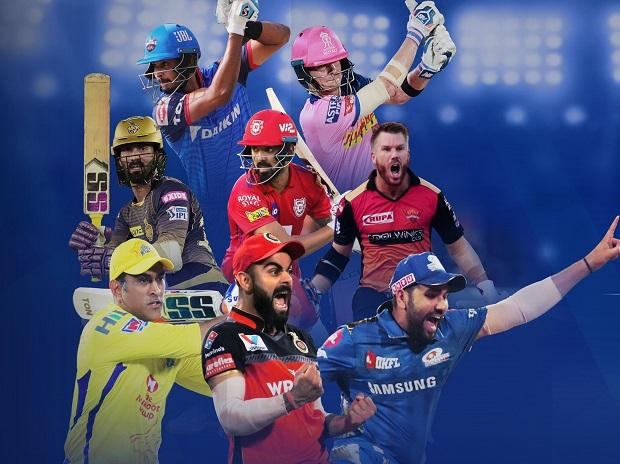

## Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
project_name = "ipl_analysis"

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Creating a new project "jainam02812/ipl_analysis"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/jainam02812/ipl-analysis


'https://jovian.ml/jainam02812/ipl-analysis'

Let's read the CSV file

In [6]:
Ipl_df = pd.read_csv('matches.csv')
Ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [7]:
# Head function is used to see top columns of a datset
Ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
#The tail() function is used to return the last n rows
Ipl_df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [9]:
Ipl_df.shape  # .shape method is used to know how many columns and row are there..

(756, 18)

Let's see names of columns :)

In [10]:
Ipl_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [11]:
# We can also Check the data type of the values in the csv
Ipl_df.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [12]:
Ipl_df.dtypes.value_counts() 

object    13
int64      5
dtype: int64

The info() function is used to print a concise summary of a DataFrame

In [13]:
Ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
# Let's see player of match in entire dataset and how many times a player has won man of the match award.. with the help of values_count method
Ipl_df['player_of_match'].value_counts()[0:]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
MR Marsh           1
DJG Sammy          1
RS Bopara          1
A Singh            1
TM Dilshan         1
Name: player_of_match, Length: 226, dtype: int64

So we can say that chris gayle has won most man of the match in entire IPL history

In [15]:
Ipl_df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

So we can say that in entire ipl season from 2008 to 2019 . Nine matches got tied and no result in four matches due to some issue such as rain or anything else...

In [16]:
#Lets see which team has won most tosses..
Ipl_df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [17]:
# Lets see how many times team has decided  to elect either fielding or batting
Ipl_df['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

From above we can say that 463 times teams has decided to field first and 293 times decided to bat first

In [18]:
# Extracting from the data set which team has won batting first
batting_first = Ipl_df[Ipl_df['win_by_runs']!=0]
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

Lets see which team has won match while bowling first

In [19]:
bowling_first = Ipl_df[Ipl_df['win_by_runs'] == 0]
bowling_first['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 52
Royal Challengers Bangalore    49
Chennai Super Kings            48
Rajasthan Royals               48
Kings XI Punjab                44
Delhi Daredevils               42
Sunrisers Hyderabad            28
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  7
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [20]:
# How many matches are played during each season
Ipl_df['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

From above we can say that most matches were played in year 2013

In [21]:
Ipl_df.describe() 

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [22]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jainam02812/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/jainam02812/ipl-analysis


'https://jovian.ml/jainam02812/ipl-analysis'

## Data Preparation & Cleaning

In [23]:
selected_columns = ['season','city','team1','team2','toss_winner','toss_decision','result','winner','win_by_runs','win_by_wickets','player_of_match']
selected_columns

['season',
 'city',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match']

In [24]:
len(selected_columns)

11

Let's extract a copy of the data from these columns into a new data frame survey_df, which we can continue to modify further without affecting the original data frame.

In [25]:
survey_df = Ipl_df[selected_columns].copy()
survey_df

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav
...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya
752,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav
753,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant
754,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis


In [26]:
schema = Ipl_df[selected_columns]


In [27]:
survey_df.shape

(756, 11)

In [28]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           756 non-null    int64 
 1   city             749 non-null    object
 2   team1            756 non-null    object
 3   team2            756 non-null    object
 4   toss_winner      756 non-null    object
 5   toss_decision    756 non-null    object
 6   result           756 non-null    object
 7   winner           752 non-null    object
 8   win_by_runs      756 non-null    int64 
 9   win_by_wickets   756 non-null    int64 
 10  player_of_match  752 non-null    object
dtypes: int64(3), object(8)
memory usage: 65.1+ KB


In [29]:
survey_df.describe()

,season,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,2013.444444,13.283069,3.350529
std,3.366895,23.471144,3.387963
min,2008.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000
50%,2013.000000,0.000000,4.000000
75%,2016.000000,19.000000,6.000000
max,2019.000000,146.000000,10.000000


## Exploratory Analysis and Visualization

In [30]:
player_of_match = survey_df.player_of_match.value_counts().head(15)
player_of_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
V Kohli           12
MEK Hussey        12
AD Russell        11
DR Smith          11
V Sehwag          11
Name: player_of_match, dtype: int64

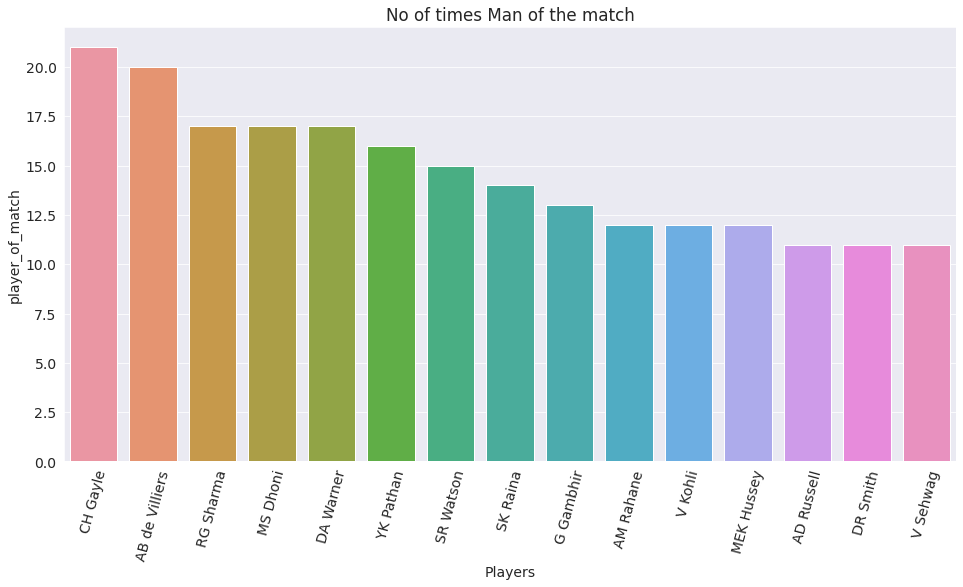

In [31]:
# making a bar-plot for the players who had won most man of the match
plt.figure(figsize = (16,8))
plt.xticks(rotation=75)
plt.title('No of times Man of the match')
plt.xlabel('Players')
sns.barplot(player_of_match.index, player_of_match);

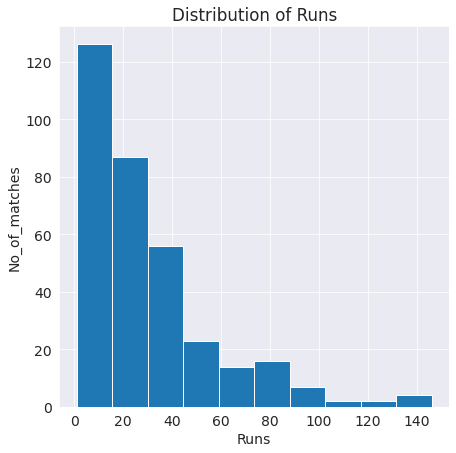

In [32]:
# making a histogram for teams who had won batting first
plt.figure(figsize = (7,7))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.ylabel("No_of_matches")
plt.show()

Above graphs shows that 120 times all teams has won by 20runs and rest of things we can visualize with help of above graph 

([<matplotlib.patches.Wedge at 0x7faffe882eb0>,
 [Text(1.002629253182323, 0.45247605534774704, 'Kolkata Knight Riders'),
  Text(0.35571821081710353, 1.0408960344304703, 'Mumbai Indians'),
  Text(-0.4638316889875975, 0.9974267713927237, 'Royal Challengers Bangalore'),
  Text(-1.012645708372343, 0.4295912817028247, 'Chennai Super Kings'),
  Text(-1.0422349693340378, -0.35177587850402364, 'Rajasthan Royals'),
  Text(-0.5738606519163824, -0.938447628896842, 'Kings XI Punjab'),
  Text(0.11222045122329569, -1.0942607414721777, 'Delhi Daredevils'),
  Text(0.6499275320450146, -0.8874650433058626, 'Sunrisers Hyderabad'),
  Text(0.88499869216115, -0.6532819566412762, 'Gujarat Lions'),
  Text(0.9847887662538957, -0.49009293594187864, 'Deccan Chargers'),
  Text(1.042234977567946, -0.35177585410875406, 'Delhi Capitals'),
  Text(1.071755015078605, -0.24767153177920792, 'Pune Warriors'),
  Text(1.0886414053883542, -0.15767019526235607, 'Rising Pune Supergiant'),
  Text(1.0968496497988196, -0.08319162

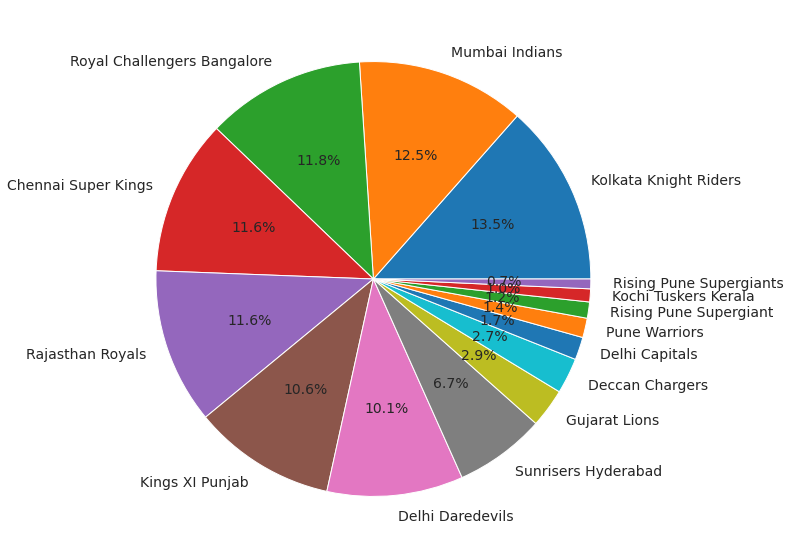

In [33]:
# Making Pie chart team who had won bowling first
plt.figure(figsize = (10,10))
plt.pie(list(bowling_first['winner'].value_counts()),labels = list(bowling_first['winner'].value_counts().keys()),autopct = '%0.1f%%')

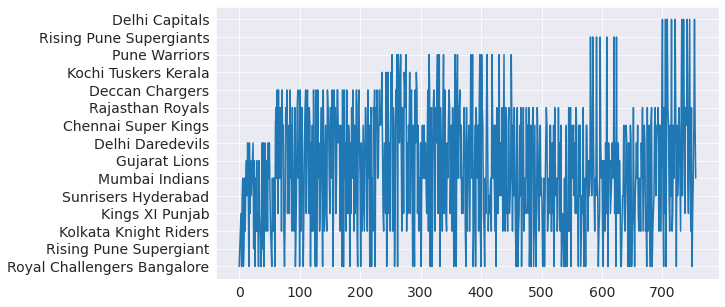

In [34]:
plt.plot(schema.toss_winner)

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


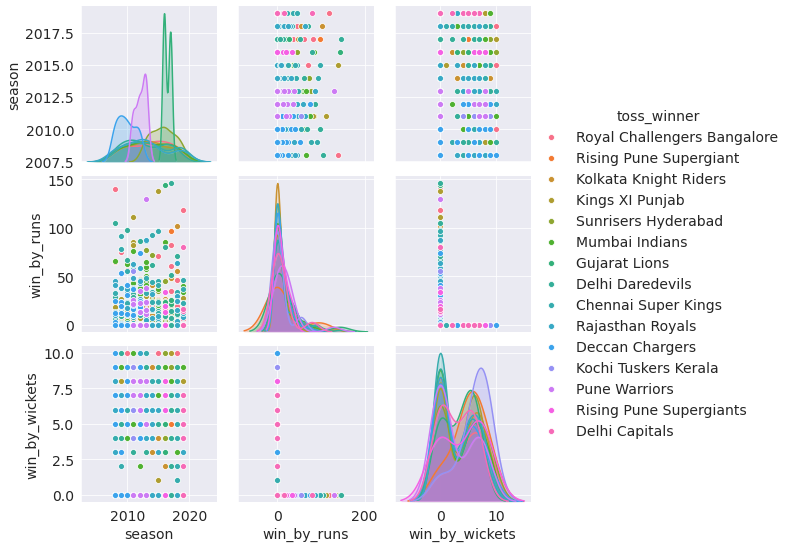

In [35]:
sns.pairplot(survey_df, hue='toss_winner');

## Asking Some question

Q) What is the ratio of batting first and bowling first?

In [36]:
ratio = Ipl_df.win_by_runs.sum() / Ipl_df.win_by_wickets.sum()
ratio

3.964469009080142

Q) Which team has won most number of matches?

In [37]:
winner = Ipl_df.winner.value_counts()
winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

It shows that Mumbai Indians has Won more Matches in entire Season from 2013 to 2019 :)

Q) Which player has won most man of the match award

In [39]:
Ipl_df['player_of_match'].value_counts()[0:]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
MR Marsh           1
DJG Sammy          1
RS Bopara          1
A Singh            1
TM Dilshan         1
Name: player_of_match, Length: 226, dtype: int64

Above figures shows that Chris gayle has won most number of man the match award

## Conclusion

1) Based on the demographics we can infer that Mumbai Indians has won most matches in entire IPL history

2) Also Conclude that bowling First Kolkata knight riders has won most number of matches

3) Mumbai Indians Has Won most number of matches batting first

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "jainam02812/ipl-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/jainam02812/ipl-analysis


'https://jovian.ml/jainam02812/ipl-analysis'